# LSTM Model in Python using TensorFlow and Keras

# Steps:
#### Prepare the data
#### Feature Scaling (Preprocessing of data)
#### Split the dataset for train and test
#### Converting features into NumPy array and reshaping the array into shape accepted by LSTM model
#### Build the architecture for LSTM network
#### Compile and fit the model (Training)
#### Evaluate the performance of model(Test)

In [33]:
#Import the libraries

import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

##### Create a 2-D feature NumPy array with random integers

In [34]:
features = pd.read_csv('newC.csv')
features.head()

,Total mAH
0,21647.46
1,21747.86
2,21829.06
3,21934.11
4,21956.06


In [35]:
print(features.shape)

(1977, 1)


##### Split the dataset into 75/25 for train and test

In [36]:
training_dataset_length = math.ceil(len(features)*.75)
print(training_dataset_length)

1483


##### Preprocess the data i.e feature scaling to scale the data to be valued in between 0 and 1, which is a good practice to scale the data before feeding it into a neural network for optimal performance. (i.e Noise removal and Normalization)

In [37]:
#Scale the all of the data to be values betwwen 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

##### Here we predict the 11th values using [1,2,….,10] values and so on. Here N = 100 and size of the sliding window is l = 10. So x_train will contain values of sliding windows of l = 10 and y_train will contain values of every l+1 value which we want to predict.

In [38]:
train_data = scaled_data[0:training_dataset_length, :]

#Splitting the data

x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])

##### Then converting the x_train and y_train into NumPy array values and reshaping it into a 3-D array, shape accepted by the LSTM model.

In [39]:
#Convert to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into 3-D array

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

##### Build the architecture. Make an object of the sequential model. Then add the LSTM layer with parameters (units: the dimension of output space, input_shape: the shape of the training set, return_sequences: Ture or False, determines whether to return the last output in the output sequence or the full sequence. We add 4 of the LSTM layers each with a dropout layer of value(0.2). Final layer is the output layer which is a fully connected dense layer(units = 1, as we are predicting only one value i.e l+1).{Dense layer performs the operation on the input layers and returns the output and every neuron at the previous layer is connected to the neurons in the next layer hence it is called fully connected Dense layer.}

In [40]:
#Build the architecture

from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 512, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 16))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))

##### plot the lstm model to see. (optional)

##### Compile the model using ‘adam optimizer’ (It is a learning rate optimization algorithm used while training of DNN models) and error is calculated by loss function ‘mean squared error’ ( as it is a regression problem so we use mean squared error loss function).Then fit the model on 30 epoch(epochs are the number of times we pass the data into the neural network) and a batch size of 50(we pass the data in batches, segmenting the data into smaller parts so as for network to process the data in parts).

In [41]:
#Compile and fit the model on 30 epochs

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 250, batch_size = 512)

Epoch 1/250
3/3 [==============================] - 0s 159ms/step - loss: 0.2015
Epoch 2/250
3/3 [==============================] - 0s 158ms/step - loss: 0.0467
Epoch 3/250
3/3 [==============================] - 0s 160ms/step - loss: 0.0264
Epoch 4/250
3/3 [==============================] - 0s 157ms/step - loss: 0.0385
Epoch 5/250
3/3 [==============================] - 0s 155ms/step - loss: 0.0222
Epoch 6/250
3/3 [==============================] - 0s 160ms/step - loss: 0.0236
Epoch 7/250
3/3 [==============================] - 0s 163ms/step - loss: 0.0194
Epoch 8/250
3/3 [==============================] - 0s 161ms/step - loss: 0.0169
Epoch 9/250
3/3 [==============================] - 0s 161ms/step - loss: 0.0157
Epoch 10/250
3/3 [==============================] - 0s 163ms/step - loss: 0.0124
Epoch 11/250
3/3 [==============================] - 1s 173ms/step - loss: 0.0127
Epoch 12/250
3/3 [==============================] - 0s 166ms/step - loss: 0.0103
Epoch 13/250
3/3 [===================

3/3 [==============================] - 1s 189ms/step - loss: 0.0064
Epoch 103/250
3/3 [==============================] - 0s 166ms/step - loss: 0.0065
Epoch 104/250
3/3 [==============================] - 0s 165ms/step - loss: 0.0065
Epoch 105/250
3/3 [==============================] - 1s 172ms/step - loss: 0.0058
Epoch 106/250
3/3 [==============================] - 1s 170ms/step - loss: 0.0057
Epoch 107/250
3/3 [==============================] - 1s 177ms/step - loss: 0.0062
Epoch 108/250
3/3 [==============================] - 1s 173ms/step - loss: 0.0058
Epoch 109/250
3/3 [==============================] - 0s 161ms/step - loss: 0.0057
Epoch 110/250
3/3 [==============================] - 1s 178ms/step - loss: 0.0061
Epoch 111/250
3/3 [==============================] - 0s 166ms/step - loss: 0.0053
Epoch 112/250
3/3 [==============================] - 1s 170ms/step - loss: 0.0054
Epoch 113/250
3/3 [==============================] - 1s 175ms/step - loss: 0.0060
Epoch 114/250
3/3 [===========

3/3 [==============================] - 1s 171ms/step - loss: 0.0052
Epoch 203/250
3/3 [==============================] - 1s 176ms/step - loss: 0.0052
Epoch 204/250
3/3 [==============================] - 1s 172ms/step - loss: 0.0052
Epoch 205/250
3/3 [==============================] - 1s 171ms/step - loss: 0.0049
Epoch 206/250
3/3 [==============================] - 1s 172ms/step - loss: 0.0047
Epoch 207/250
3/3 [==============================] - 1s 170ms/step - loss: 0.0049
Epoch 208/250
3/3 [==============================] - 1s 171ms/step - loss: 0.0051
Epoch 209/250
3/3 [==============================] - 1s 172ms/step - loss: 0.0051
Epoch 210/250
3/3 [==============================] - 1s 169ms/step - loss: 0.0050
Epoch 211/250
3/3 [==============================] - 1s 173ms/step - loss: 0.0052
Epoch 212/250
3/3 [==============================] - 1s 170ms/step - loss: 0.0049
Epoch 213/250
3/3 [==============================] - 1s 168ms/step - loss: 0.0050
Epoch 214/250
3/3 [===========

###### Create test data similar to train data, convert to NumPy array and reshape the array to 3-D shape.

In [42]:
#Test data set

test_data = scaled_data[training_dataset_length - 10: , : ]

#splitting the x_test and y_test data sets

x_test = []
y_test =  scaled_data[training_dataset_length : , : ] 

for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])
    
#Convert x_test to a numpy array

x_test = np.array(x_test)

#Reshape the data into 3-D array

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

##### Making the predictions and calculating the rmse score(smaller the rmse score, better the model has performed).

In [43]:
#check predicted values

predictions = model.predict(x_test) 

#Calculate RMSE score

rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.02474672604596338

In [44]:
#Undo scaling

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

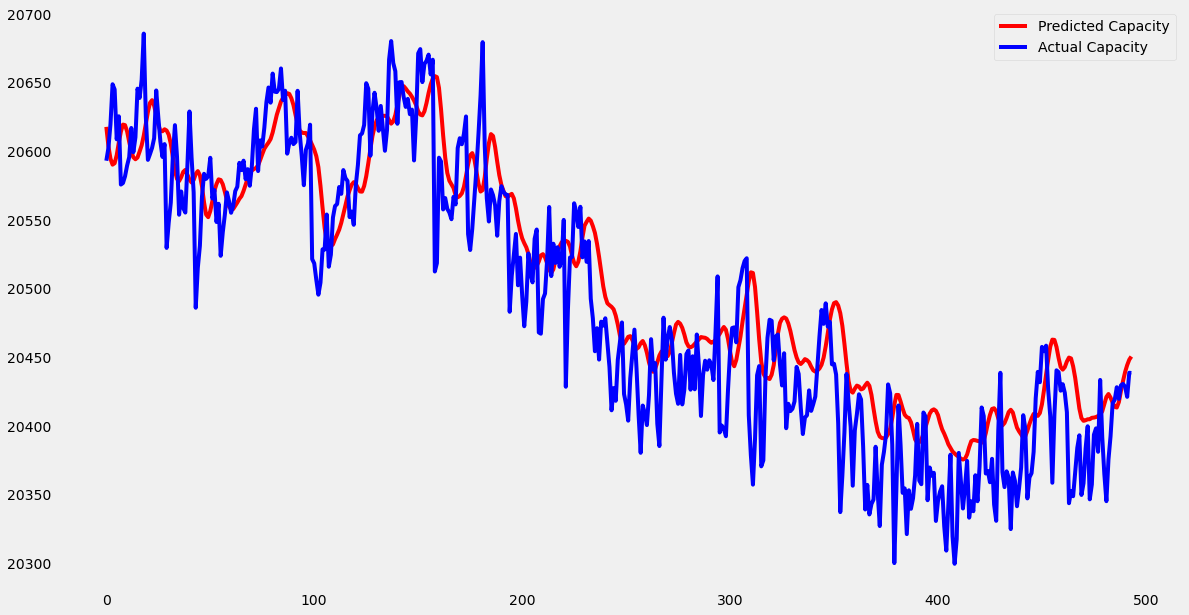

In [51]:
fig = plt.figure(figsize=(18,10))
plt.plot(predictions,color='red', label='Predicted Capacity')
plt.plot(y_test,color='blue', label='Actual Capacity')
plt.legend(loc='upper right')
plt.grid()
plt.show()